

#IDENTITHEM
_Synthesis Project_



*   Amelia Gómez Grabowska (1631745)
*   Sara Martín Nuñez (1669812)
*   Lara Rodríguez Cuenca (1667906)
*   Malaika Mbayo Michelle (1695157)
*   Aina Navarro Rafols (1670797)

# PART II: Unsupervised Learning Algorithms

## Import libraries and data

In [1]:
!pip install seaborn
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os

# List the contents of the current directory
print("Contents of the current directory:")
print(os.listdir('.'))

# If there is a 'content' directory, list its contents
if os.path.exists('./content'):
    print("\nContents of 'content' directory:")
    print(os.listdir('./content'))

# If there is an 'Identithem' directory, list its contents
if os.path.exists('./content/Identithem'):
    print("\nContents of 'Identithem' directory:")
    print(os.listdir('./content/Identithem'))

# If there is a 'TEST' directory inside 'Identithem', list its contents
if os.path.exists('./content/Identithem/TEST'):
    print("\nContents of 'TEST' directory:")
    print(os.listdir('./content/Identithem/TEST'))


Contents of the current directory:
['analyze_request.py', 'TEST.zip', 'rules', 'Unsupervised_learning_Identithem_extractnormal_FINAL.ipynb', 'train&test.zip', 'detect_bad_users.py', 'SitgesLogs.zip', 'full_blacklist_database.txt', '.git', 'preprocessed_logs.zip']


In [3]:
import zipfile
import os

# Path to the zip file
zip_path = 'TEST.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_TEST')

# List the contents of the extracted directory
print("Contents of the 'extracted_TEST' directory:")
print(os.listdir('extracted_TEST'))


Contents of the 'extracted_TEST' directory:
['TEST']


In [4]:
csv_path = 'extracted_TEST/TEST/test.csv'

# Read the CSV file
data = pd.read_csv(csv_path)
data

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,date_minute,date_second,req_verb,req_path_we,req_http,request_we,referer_we,useragent_we,is_attack,is_blacklist
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0,12,0,-0.000932,0,0.001665,-0.002216,0.030256,0,0
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0,13,0,-0.001808,0,-0.006417,-0.002216,0.030256,0,0
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0,24,0,-0.001224,0,-0.001013,-0.002216,0.023224,0,0
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0,25,0,-0.002568,0,-0.004068,-0.048319,0.023224,0,0
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0,25,0,-0.002956,0,-0.004762,-0.048319,0.023224,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,17,39,0,-0.001196,0,-0.014940,-0.004960,0.004603,0,1
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,17,40,0,-0.001609,0,-0.017335,-0.004960,0.004603,0,1
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,17,41,0,-0.000244,0,0.010044,-0.000674,0.009050,0,0
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,17,42,0,-0.000352,0,0.007645,-0.000674,0.009050,0,0


## 1. Clustering algorithm: K-Means

In [6]:
# Standarize data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std

array([[-0.55130492,  1.99541546, -0.06908015, ...,  0.22447962,
        -0.07040543, -1.08261818],
       [-0.55130492,  1.99541546, -0.06892895, ...,  0.22447962,
        -0.07040543, -1.08261818],
       [-0.4641705 , -0.32121421, -0.04420451, ..., -0.07718417,
        -0.07040543, -1.08261818],
       ...,
       [-0.46263459,  1.99541546, -0.06985587, ..., -0.68522823,
        -0.07040543, -1.08261818],
       [-0.46263459, -0.32121421, -0.0332524 , ..., -0.68522823,
        -0.07040543, -1.08261818],
       [-0.46263459, -0.32121421, -0.06177983, ..., -0.68522823,
        -0.07040543, -1.08261818]])

In [7]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca

array([[ 2.87822971,  0.02027839],
       [ 2.21444162, -0.03251043],
       [ 1.75172621,  0.07647942],
       ...,
       [ 4.8688842 , -0.24823393],
       [ 2.68725171,  0.39773969],
       [ 0.08212216,  0.3858869 ]])

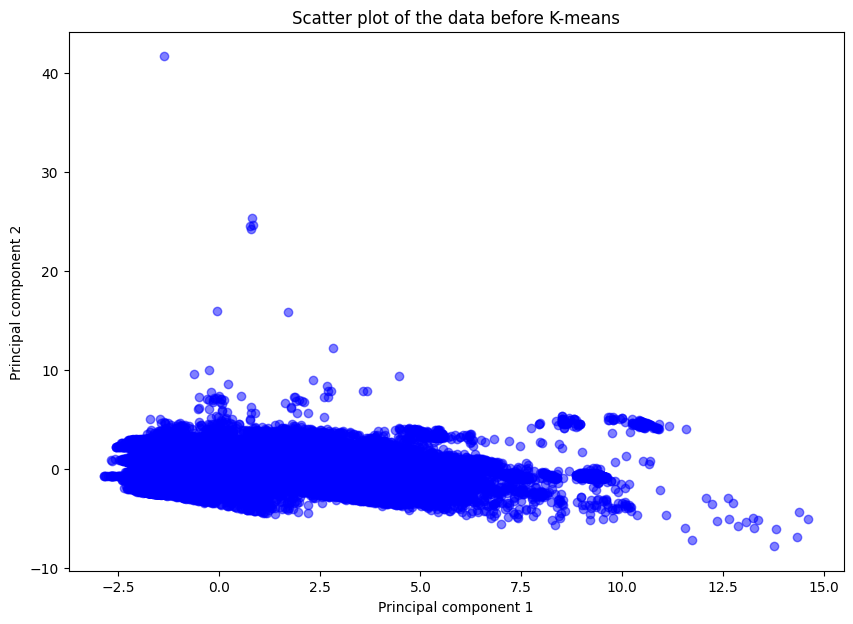

In [8]:
# Visualize scatter plot of the data before K-means
plt.figure(figsize=(10,7))
plt.scatter(data_pca[:,0],data_pca[:,1], c="blue",alpha=0.5)
plt.title("Scatter plot of the data before K-means")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [9]:
# Defining K-Means model
kmeans = KMeans(n_clusters=2,random_state=42,n_init=10)
# Fit the model to PCA data
kmeans.fit(data_pca)
# Predict cluster labels
labels = kmeans.predict(data_pca)
# Count values for each label
unique, counts = np.unique(labels,return_counts=True)
print(dict(zip(unique,counts)))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f123dd1c8b0>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f123dd1c8b0>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_itera

{0: 285228, 1: 52128}


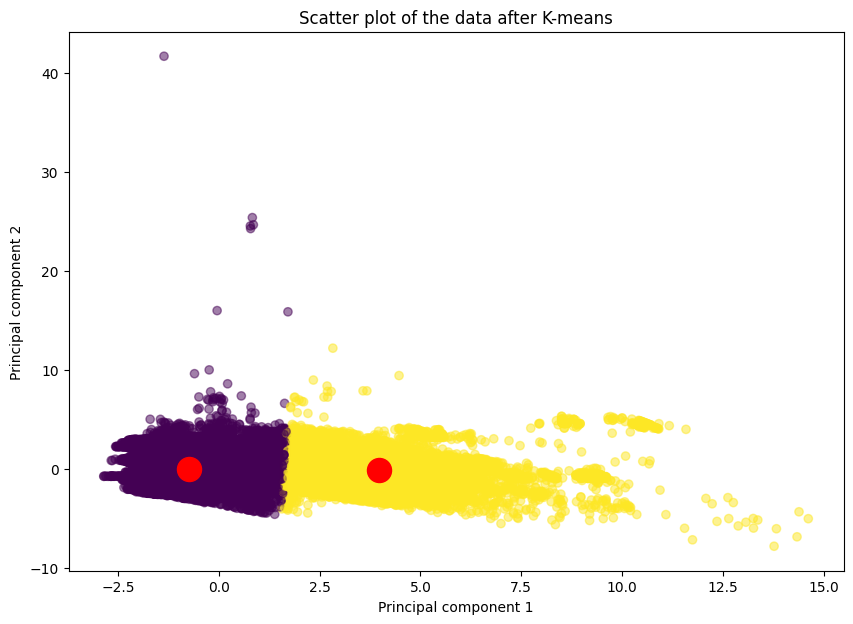

In [10]:
# Visualize clusters
plt.figure(figsize=(10,7))
plt.scatter(data_pca[:,0],data_pca[:,1],c=labels,cmap="viridis",alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="red")
plt.title("Scatter plot of the data after K-means")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [11]:
# Compute distances to cluster centers
distances = kmeans.transform(data_pca)
# Compute anomaly score (distance to closest centroid)
scores = distances.min(axis=1)

/tmp/ipykernel_71621/1073609272.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds")


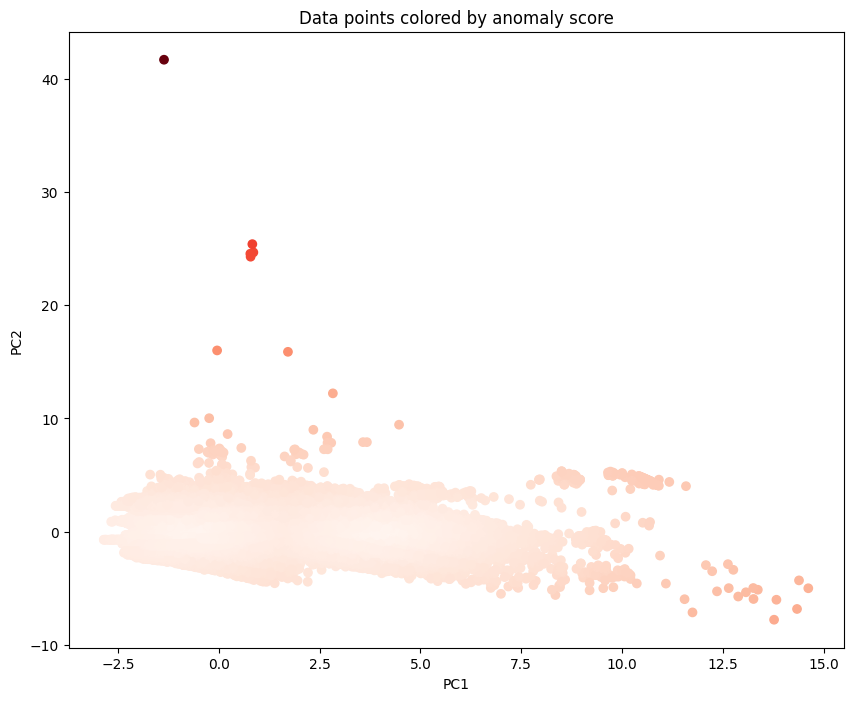

In [12]:
# Visualize anomaly scores
cmap = cm.get_cmap("Reds")
normalized_scores = (scores - min(scores)) / (max(scores) - min(scores))
plt.figure(figsize=(10,8))
plt.scatter(data_pca[:,0], data_pca[:,1],c=cmap(normalized_scores))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data points colored by anomaly score")
plt.show()

In [13]:
# Append anomaly normalized scores to dataframe
normalized_scores_df = pd.Series(normalized_scores, name="anomaly_score")
data_with_results = pd.concat([data.reset_index(drop=True),normalized_scores_df],axis=1)

# Append label of each log line using a threshold
threshold = 0.1
data_with_results["kmeans_result"] = (data_with_results["anomaly_score"] > threshold).astype(int)

# Show results
data_with_results

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,req_verb,req_path_we,req_http,request_we,referer_we,useragent_we,is_attack,is_blacklist,anomaly_score,kmeans_result
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0,-0.000932,0,0.001665,-0.002216,0.030256,0,0,0.026291,0
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0,-0.001808,0,-0.006417,-0.002216,0.030256,0,0,0.042150,0
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0,-0.001224,0,-0.001013,-0.002216,0.023224,0,0,0.053346,0
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0,-0.002568,0,-0.004068,-0.048319,0.023224,0,0,0.013480,0
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0,-0.002956,0,-0.004762,-0.048319,0.023224,0,0,0.017192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,0,-0.001196,0,-0.014940,-0.004960,0.004603,0,1,0.021297,0
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,0,-0.001609,0,-0.017335,-0.004960,0.004603,0,1,0.017537,0
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,0,-0.000244,0,0.010044,-0.000674,0.009050,0,0,0.021529,0
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,0,-0.000352,0,0.007645,-0.000674,0.009050,0,0,0.032691,0


In [14]:
# Count how many log lines are anomalies and how many are normal
print("Number of anomaly logs:",(data_with_results['kmeans_result'] == 1).sum())
print("Number of normal logs:",(data_with_results['kmeans_result'] == 0).sum())

Number of anomaly logs: 4069
Number of normal logs: 333287


## 2. DBSCAN - Density-Based Spatial Clustering of Applications with Noise



In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

X = data.values
# DBSCAN parameters
eps = 0.8  # Maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # Minimum number of samples required for a cluster

# Fit DBSCAN to the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)#2.40min

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1212158ca0>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


DBSCAN(eps=0.8)

In [16]:
# Get the labels assigned by DBSCAN (-1 for outliers, 0 and above for clusters)
labels = dbscan.labels_

# Anomalies are data points labeled as -1 (outliers)
anomaly_indices = np.where(labels == -1)[0]

# Add the DBSCAN anomaly labels as a new column in the DataFrame
data_with_results['DBSCAN_Anomaly'] = 0  # Initialize all points as not anomalies (0)
data_with_results.iloc[anomaly_indices, -1] = 1  # Set anomalies to 1

In [17]:
c_1 = 0
c= 0
for values in data_with_results['DBSCAN_Anomaly']:
  if values == 1:
    c_1+=1
  else:
    c+=1
print("ANOMALIES (1):",c_1)
print("VALID:",c)

ANOMALIES (1): 147884
VALID: 189472


## 3. Isolation Forest

In [18]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_std = scaler.fit_transform(data)
model = IsolationForest(contamination=0.1)
model.fit(X_std)

IsolationForest(contamination=0.1)

In [20]:
y_pred = model.predict(X_std)
y_pred = [1 if x == -1 else 0 for x in y_pred]
data_with_results['Isolation Forest Anomaly Prediction'] = y_pred
c_0 = 0
c_1 = 0
for i,values in enumerate(data_with_results['Isolation Forest Anomaly Prediction']):
  if values == 0:
    c_0+=1
  elif values == 1:
    c_1+=1

print("Number of anomaly logs:",(data_with_results['Isolation Forest Anomaly Prediction'] == 1).sum())
print("Number of normal logs:",(data_with_results['Isolation Forest Anomaly Prediction'] == 0).sum())

Number of anomaly logs: 33736
Number of normal logs: 303620


## Local Outlier Factor (LOF) method

In [21]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.3)
y_lof = lof.fit_predict(X)#3.30 min

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1212173940>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [22]:
data_with_results['LOF_Prediction'] = y_lof

In [23]:
c_1 = 0
c= 0
for values in data_with_results['LOF_Prediction']:
  if values == 1:
    c_1+=1
  else:
    c+=1
print("VALID:",c_1)
print("ANOMALIES (-1):",c)

VALID: 236151
ANOMALIES (-1): 101205


### GMM

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1212173940>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_itera

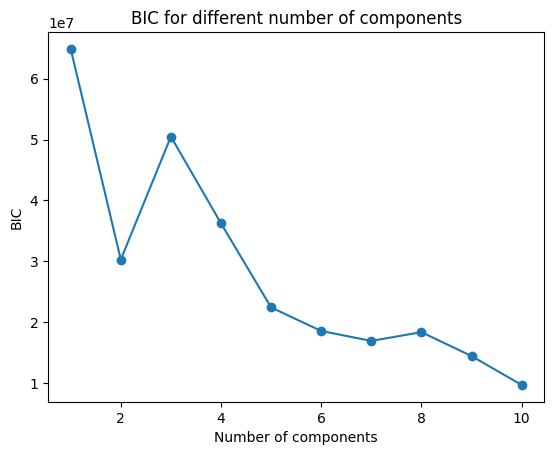

Optimal number of components: 10


In [24]:
#4min
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Define the range of components to test
n_components_range = range(1, 11)

# Store BIC values for each number of components
bics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))

# Plot BIC values to find the optimal number of components
plt.plot(n_components_range, bics, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC for different number of components')
plt.show()

# Optimal number of components
optimal_n_components = n_components_range[np.argmin(bics)]
print("Optimal number of components:", optimal_n_components)


In [25]:
from sklearn.mixture import GaussianMixture

# Train GMM
gmm = GaussianMixture(n_components=optimal_n_components)
gmm.fit(X)

# Get log-likelihoods (higher values indicate normal points, lower values indicate anomalies)
scores = gmm.score_samples(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1211e6f8b0>
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [26]:
threshold = np.percentile(scores, 75)
# Classify as anomalies (1) or normal (0)
anomalies = scores > threshold
data_with_results['score'] = scores
data_with_results['anomaly'] = anomalies.astype(int)


In [27]:
num_anomalies = data_with_results['anomaly'].sum()
num_normal = len(data_with_results) - num_anomalies

# Print the counts
print("Number of anomalies:", num_anomalies)
print("Number of normal data points:", num_normal)

Number of anomalies: 84339
Number of normal data points: 253017


In [28]:
data_with_results

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,useragent_we,is_attack,is_blacklist,anomaly_score,kmeans_result,DBSCAN_Anomaly,Isolation Forest Anomaly Prediction,LOF_Prediction,score,anomaly
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0.030256,0,0,0.026291,0,1,0,-1,-50.081634,0
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0.030256,0,0,0.042150,0,1,0,-1,-50.443050,0
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0.023224,0,0,0.053346,0,1,0,-1,-57.340641,0
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0.023224,0,0,0.013480,0,1,0,-1,-51.998813,0
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0.023224,0,0,0.017192,0,1,0,-1,-91.228917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,0.004603,0,1,0.021297,0,0,0,-1,-21.591090,0
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,0.004603,0,1,0.017537,0,0,0,-1,-22.331652,0
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,0.009050,0,0,0.021529,0,1,1,-1,-70.092258,0
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,0.009050,0,0,0.032691,0,1,0,-1,-57.563937,0


## Total normal logs based on all methods

In [29]:
# Creating the 'is_Anomaly' feature based on the conditions
data_with_results['is_Anomaly'] = (
    (data_with_results['kmeans_result'] == 1) |
    (data_with_results['DBSCAN_Anomaly'] == 1) |
    (data_with_results['Isolation Forest Anomaly Prediction'] == 1) |
    (data_with_results['LOF_Prediction'] == -1) |
    (data_with_results['anomaly'] == 1)
).astype(int)

# Display the DataFrame with the new feature
data_with_results

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,is_attack,is_blacklist,anomaly_score,kmeans_result,DBSCAN_Anomaly,Isolation Forest Anomaly Prediction,LOF_Prediction,score,anomaly,is_Anomaly
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0,0,0.026291,0,1,0,-1,-50.081634,0,1
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0,0,0.042150,0,1,0,-1,-50.443050,0,1
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0,0,0.053346,0,1,0,-1,-57.340641,0,1
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0,0,0.013480,0,1,0,-1,-51.998813,0,1
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0,0,0.017192,0,1,0,-1,-91.228917,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,0,1,0.021297,0,0,0,-1,-21.591090,0,1
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,0,1,0.017537,0,0,0,-1,-22.331652,0,1
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,0,0,0.021529,0,1,1,-1,-70.092258,0,1
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,0,0,0.032691,0,1,0,-1,-57.563937,0,1


In [30]:
# Calculate the number of rows that are anomaly
anomaly_count = data_with_results['is_Anomaly'].sum()

# Calculate the number of rows that are normal
normal_count = (data_with_results.shape[0]) - anomaly_count

# Print the counts
print("Number of anomaly logs based on all models is:", anomaly_count)
print("Number of normal logs based on all models is:", normal_count)

Number of anomaly logs based on all models is: 256686
Number of normal logs based on all models is: 80670


In [31]:
data_with_results.to_csv('identithem_logs_testfiles(3days)_unsupervisedmethods.csv', index=False)

In [32]:
data_with_results.columns

Index(['ip', 'status', 'size', 'n_nans', 'is_bot', 'n_requests', 'n_bots',
       'n_errors', 'average_size', 'average_timedif', 'sec_since_last_req',
       'sec_until_next_req', 'n_useragents', 'date_month', 'date_day',
       'date_hour', 'date_minute', 'date_second', 'req_verb', 'req_path_we',
       'req_http', 'request_we', 'referer_we', 'useragent_we', 'is_attack',
       'is_blacklist', 'anomaly_score', 'kmeans_result', 'DBSCAN_Anomaly',
       'Isolation Forest Anomaly Prediction', 'LOF_Prediction', 'score',
       'anomaly', 'is_Anomaly'],
      dtype='object')

In [33]:
chosen_cols = ['ip', 'status', 'size', 'n_nans', 'is_bot', 'n_requests', 'n_bots',
       'n_errors', 'average_size', 'average_timedif', 'sec_since_last_req',
       'sec_until_next_req', 'n_useragents', 'date_month', 'date_day',
       'date_hour', 'date_minute', 'date_second', 'req_verb', 'req_path_we',
       'req_http', 'request_we', 'referer_we', 'useragent_we', 'is_attack',
       'is_blacklist']

final_df = data_with_results[chosen_cols].copy()
filtered_df_anomaly = final_df[data_with_results['is_Anomaly'] == 1]
filtered_df_normal = final_df[data_with_results['is_Anomaly'] == 0]


In [34]:
filtered_df_anomaly.to_csv('identithem_logs_notnormal.csv', index=False)

In [35]:
filtered_df_normal.to_csv('identithem_logs_normal.csv', index=False)

Bad pipe message: %s [b'\xd5A\xc6\x9f\xfa\xe3\x7f\xf7\\\xf4"\xd4K\xfe\xafd\xb0\xd2 {\xde\x95"\x9e\xcb\xb5\xbf\xecQ\x16>\xc3\xc1:\xbd\x86\xb7\xa6\x8d\x16d\xeb9\xfb\xe4\x0e\x86\x8f\xa7\x87S\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xe6\x93\xaa\x0e\xe7']
Bad pipe message: %s [b"Q\xdd\x1c\x8c\xb0\x95\x7f\x07\x84\xce\x04\x197\xba\xb5\xf6\x1d6\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc